In [1]:
# Import our dependencies

import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler 
from tensorflow import keras
from tensorflow.keras import layers
import math
import numpy as np

df = pd.read_csv("../../Resources/stocks_joined.csv")
df.head()

,company_id,company,date_ipo,market_capitalization,pet_market_segment,company_size,Date,Adj_Close,Volume,Ticker
0,1,"Chewy, Inc,",2019-06-14,13.95B,"Pet Supplies, E-commerce",21300,2019-06-17 00:00:00,33.700001,15403000,CHWY
1,1,"Chewy, Inc,",2019-06-14,13.95B,"Pet Supplies, E-commerce",21300,2019-06-18 00:00:00,37.360001,11022800,CHWY
2,1,"Chewy, Inc,",2019-06-14,13.95B,"Pet Supplies, E-commerce",21300,2019-06-19 00:00:00,34.900002,11163600,CHWY
3,1,"Chewy, Inc,",2019-06-14,13.95B,"Pet Supplies, E-commerce",21300,2019-06-20 00:00:00,34.230000,7901000,CHWY
4,1,"Chewy, Inc,",2019-06-14,13.95B,"Pet Supplies, E-commerce",21300,2019-06-21 00:00:00,32.279999,9277700,CHWY


In [2]:
df.dtypes

company_id                 int64
company                   object
date_ipo                  object
market_capitalization     object
pet_market_segment        object
company_size               int64
Date                      object
Adj_Close                float64
Volume                     int64
Ticker                    object
dtype: object

In [3]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.rename(columns = {'Adj Close':'Adj_Close'}, inplace=True)
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2347 entries, 2019-06-17 to 2021-06-14
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   company_id             2347 non-null   int64  
 1   company                2347 non-null   object 
 2   date_ipo               2347 non-null   object 
 3   market_capitalization  2347 non-null   object 
 4   pet_market_segment     2347 non-null   object 
 5   company_size           2347 non-null   int64  
 6   Adj_Close              2347 non-null   float64
 7   Volume                 2347 non-null   int64  
 8   Ticker                 2347 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 183.4+ KB


Ticker
CHWY    AxesSubplot(0.125,0.2;0.775x0.68)
ELAN    AxesSubplot(0.125,0.2;0.775x0.68)
FRPT    AxesSubplot(0.125,0.2;0.775x0.68)
PETQ    AxesSubplot(0.125,0.2;0.775x0.68)
Name: Adj_Close, dtype: object

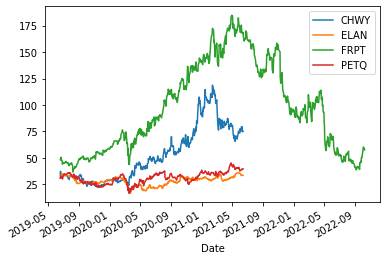

In [5]:
df.groupby('Ticker')['Adj_Close'].plot(legend=True)

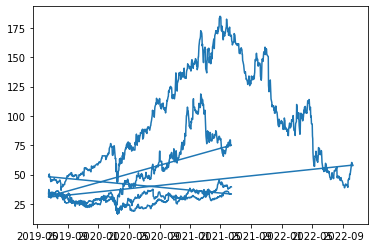

In [4]:
plt.plot(df.Adj_Close)

In [6]:
# separate target and features

y = df['Adj_Close']
X = df.drop(columns=['Adj_Close'])

In [7]:
close_prices = df['Adj_Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [8]:
x_train

array([[[0.13318147],
        [0.11982189],
        [0.15772578],
        ...,
        [0.12292876],
        [0.1103977 ],
        [0.11712924]],

       [[0.11982189],
        [0.15772578],
        [0.13224941],
        ...,
        [0.1103977 ],
        [0.11712924],
        [0.0860605 ]],

       [[0.15772578],
        [0.13224941],
        [0.12531069],
        ...,
        [0.11712924],
        [0.0860605 ],
        [0.0844035 ]],

       ...,

       [[0.50921709],
        [0.56731569],
        [0.54504972],
        ...,
        [0.22328085],
        [0.2812759 ],
        [0.24533969]],

       [[0.56731569],
        [0.54504972],
        [0.55768437],
        ...,
        [0.2812759 ],
        [0.24533969],
        [0.25735294]],

       [[0.54504972],
        [0.55768437],
        [0.53044736],
        ...,
        [0.24533969],
        [0.25735294],
        [0.31193041]]])

In [9]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [10]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
612/612 [==============================] - 10s 12ms/step - loss: 0.0062
Epoch 2/3
612/612 [==============================] - 8s 12ms/step - loss: 0.0025
Epoch 3/3
612/612 [==============================] - 7s 12ms/step - loss: 0.0020


In [12]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

6/6 [==============================] - 1s 14ms/step


3.55080229104194

C:\Users\laura\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


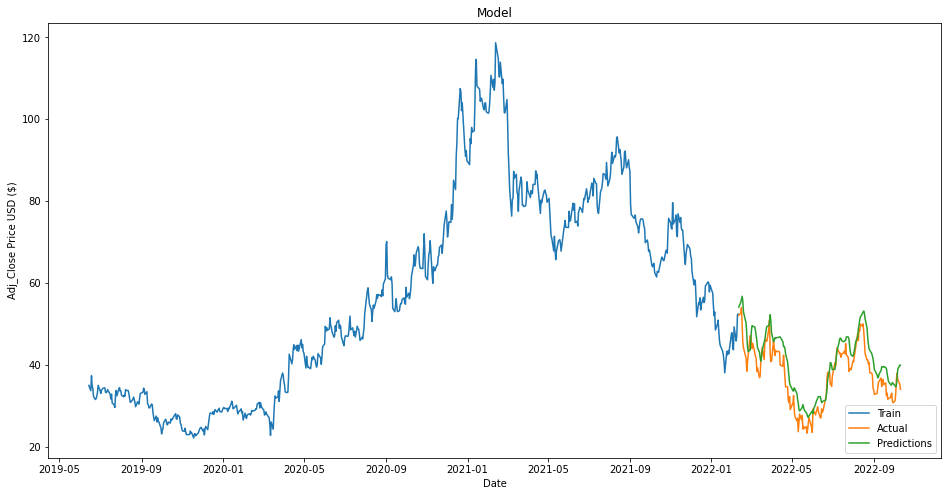

In [13]:
data = df.filter(['Adj_Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Adj_Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Adj_Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()

source: https://medium.com/the-handbook-of-coding-in-finance/stock-prices-prediction-using-long-short-term-memory-lstm-model-in-python-734dd1ed6827

In [14]:
validation

,Adj_Close,Predictions
Date,,
2022-02-11,52.099998,54.111618
2022-02-14,52.630001,55.300968
2022-02-15,54.000000,56.003746
2022-02-16,49.560001,56.763084
2022-02-17,45.660000,55.660458
...,...,...
2022-10-05,36.669998,35.104378
2022-10-06,37.939999,36.870007
2022-10-07,36.340000,38.950783


In [15]:
validation.to_csv("CHWY_LSTM_model_validation_for_Tableau.csv")